# Etapa 5 - Infografía Final

**Proyecto:** Ciencia de Datos - Preparación de Datos  
**Universidad:** Pontificia Universidad Javeriana  
**Curso:** Tecnologías Emergentes 2025  
**Profesor:** Luis Carlos Chicaíza

---

## Objetivo de esta Etapa

Realizar una **infografía** a partir de los datos generados en las etapas anteriores, 
enfocada en mostrar la información más relevante respecto al objetivo de negocio, 
sin detenerse en el procedimiento técnico. La infografía debe evidenciar patrones o 
relaciones clave encontrados en el análisis.


## 1. Configuración Inicial


In [12]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import sys
import os
sys.path.append(os.path.abspath(".."))

from src.infografia import (
    cargar_vista_minable,
    cargar_resumen_accidentes,
    calcular_metricas_resumen,
    crear_infografia,
    exportar_infografia,
)

# Configuración
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = 10

print('✓ Librerías importadas y configuradas')


✓ Librerías importadas y configuradas


## 2. Carga de la Vista Minable y Tabla Resumen


In [13]:
# Rutas de entrada (generadas en la Etapa 4)
ruta_vista = '../data/processed/accidentes_transito_vista_minable.csv'
ruta_resumen = '../data/processed/accidentes_transito_resumen_mes_comuna.csv'

# Cargar datos
df_vista = cargar_vista_minable(ruta_vista)
df_resumen = cargar_resumen_accidentes(ruta_resumen)

print('='*80)
print('VISTA MINABLE - INFORMACIÓN BÁSICA')
print('='*80)
print(f'Registros (vista): {len(df_vista):,}')
print(f'Columnas  (vista): {df_vista.shape[1]}')
display(df_vista.head())

print('\n' + '='*80)
print('TABLA RESUMEN - INFORMACIÓN BÁSICA')
print('='*80)
print(f'Registros (resumen): {len(df_resumen):,}')
print(f'Columnas  (resumen): {df_resumen.shape[1]}')
display(df_resumen.head())


VISTA MINABLE - INFORMACIÓN BÁSICA
Registros (vista): 39,193
Columnas  (vista): 18


,AÑO,MES,DÍA,GRAVEDAD,BARRIO,COMUNA,ENTIDAD,Propietario de Vehículo,anio,mes_num,dia_mes,dia_semana,es_fin_de_semana,hora_num,franja_horaria,periodo_dia,comuna_codigo,comuna_nombre
0,2012,01. Enero,07. Domingo,Con heridos,Mutis,17. MUTIS,AGENTES DTB,Particular,2012,1,1,Domingo,True,12.00,Tarde,Diurno,17,MUTIS
1,2012,01. Enero,07. Domingo,Solo daños,Regaderos Norte,02. NORORIENTAL,AGENTES DTB,Empresa,2012,1,1,Domingo,True,14.00,Tarde,Diurno,02,NORORIENTAL
2,2012,01. Enero,07. Domingo,Solo daños,Cabecera Del Llano,12. CABECERA DEL LLANO,AGENTES DTB,Particular,2012,1,1,Domingo,True,12.00,Tarde,Diurno,12,CABECERA DEL LLANO
3,2012,01. Enero,07. Domingo,Solo daños,Norte Bajo,03. SAN FRANCISCO,AGENTES DTB,Empresa,2012,1,1,Domingo,True,18.00,Noche,Nocturno,03,SAN FRANCISCO
4,2012,01. Enero,07. Domingo,Con heridos,Dangond,11. SUR,AGENTES DTB,Particular,2012,1,1,Domingo,True,0.00,Madrugada,Nocturno,11,SUR



TABLA RESUMEN - INFORMACIÓN BÁSICA
Registros (resumen): 5,259
Columnas  (resumen): 5


,anio,mes_num,comuna_nombre,GRAVEDAD,n_accidentes
0,2012,1,1,Con muertos,1
1,2012,1,3,Con heridos,1
2,2012,1,3,Solo daños,1
3,2012,1,CABECERA DEL LLANO,Con heridos,13
4,2012,1,CABECERA DEL LLANO,Solo daños,39


## 3. Métricas Clave para el Objetivo de Negocio

Antes de generar la infografía, se calculan algunas métricas clave que resumen el comportamiento 
general de la accidentalidad en la ciudad y que servirán como base para la narrativa visual.


In [14]:
# Calcular métricas de resumen
metricas = calcular_metricas_resumen(df_vista, df_resumen)

print('MÉTRICAS CLAVE DEL CONJUNTO DE DATOS')
print('-'*50)
for k, v in metricas.items():
    print(f"{k}: {v}")


MÉTRICAS CLAVE DEL CONJUNTO DE DATOS
--------------------------------------------------
total_accidentes: 39193
anio_min: 2012
anio_max: 2023
n_anios: 12
n_comunas: 21
gravedad_mas_frecuente: Solo daños
comuna_top_nombre: CABECERA DEL LLANO
comuna_top_accidentes: 6415


## 4. Generación de la Infografía

A partir de la vista minable y las métricas calculadas, se construye una infografía que incluye:

- Resumen visual de indicadores clave (total de accidentes, rango de años, comunas, etc.).  
- Distribución de accidentes por gravedad.  
- Top de comunas con mayor número de accidentes.  
- Evolución anual del número de accidentes.  
- Relación entre gravedad y franja horaria.


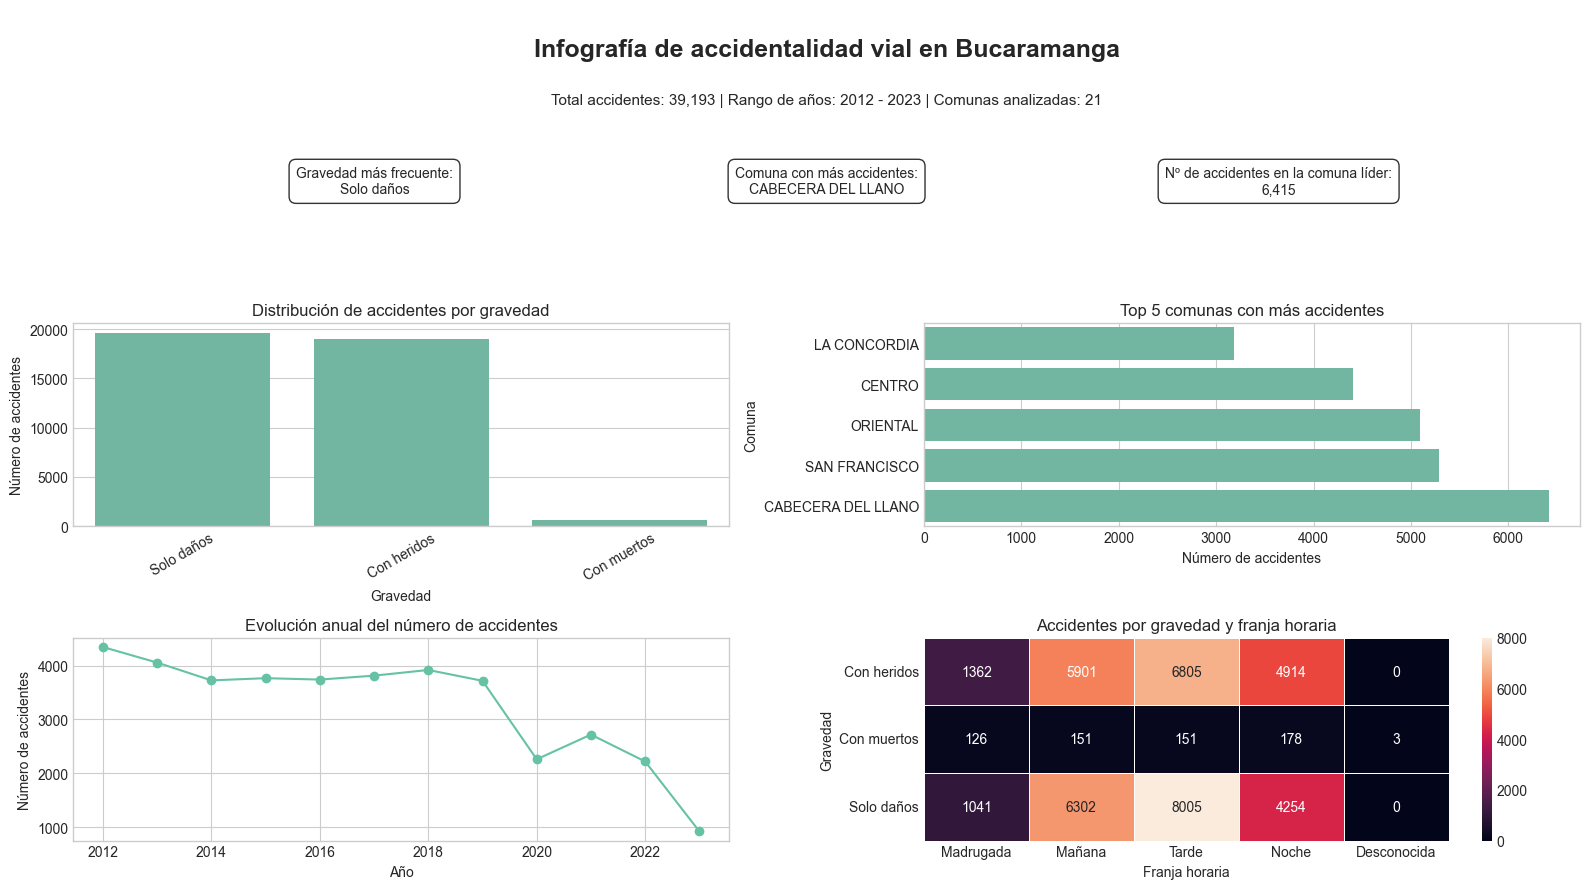

In [15]:
# Crear figura de la infografía
fig = crear_infografia(
    df_vista=df_vista,
    df_resumen=df_resumen,
    metricas=metricas,
    titulo='Infografía de accidentalidad vial en Bucaramanga',
)
plt.show()


### 4.1 Exportación de la Infografía

Se guarda la infografía en la carpeta `visualizations/` para ser incluida en el informe final 
y en la presentación de sustentación.


In [16]:
# Exportar la infografía a archivo
ruta_salida_infografia = '../visualizations/infografia_accidentes.png'
exportar_infografia(fig, ruta_salida_infografia)
print(f'Infografía exportada en: {ruta_salida_infografia}')


Infografía exportada en: ../visualizations/infografia_accidentes.png


## 5. Interpretación de la Infografía

En el documento escrito del proyecto (no en este notebook) se deben incluir comentarios como los siguientes:

- **Comportamiento global:** describir el volumen total de accidentes y el período temporal cubierto.
- **Gravedad:** interpretar qué tipo de accidentes predomina y qué implicaciones puede tener para la gestión vial.
- **Territorio (comunas):** identificar las comunas más críticas y plantear posibles hipótesis sobre por qué concentran más casos.
- **Evolución temporal:** analizar si se observa tendencia al alza, a la baja o estabilidad a lo largo de los años.
- **Patrones horarios:** comentar en qué franjas horarias se concentran los accidentes y cómo se relaciona esto con la gravedad.

Estas interpretaciones deben centrarse en lo que la **información** revela respecto al objetivo de negocio 
(por ejemplo, priorización de intervenciones viales, campañas de seguridad, regulación de tráfico, etc.), 
más que en los detalles técnicos del procesamiento de datos.
